In [1]:
import pandas as pd

In [2]:
#loading a local excel sheet into pandas and then showing the first 10 rows. Creating a dataframe from that sheet.
df = pd.read_excel('PRR_11855_Landlord_2015.xlsx', sheet_name=0)
df.head()

,Account_number,Account_name,Account_address,CITY_AND_STATE,Full_Account_Address,Business_type,Transaction_type,Merge_date,Num_LLC
0,2845784,J. W. & B. O. SILVEIRA,243 30TH ST,"OAKLAND, CA","243 30TH ST, OAKLAND, CA",M,License Issued,2015-04-02,135
1,2845792,J. W. & B. O. SILVEIRA,3616 RICHMOND BLVD,"OAKLAND, CA","3616 RICHMOND BLVD, OAKLAND, CA",M,License Issued,2015-04-02,135
2,2845814,J. W. & B. O. SILVEIRA,3201 STAR AVE,"OAKLAND, CA","3201 STAR AVE, OAKLAND, CA",M,License Issued,2015-04-02,135
3,2845822,J. W. & B. O. SILVEIRA,1118 E 12TH ST,"OAKLAND, CA","1118 E 12TH ST, OAKLAND, CA",N,License Issued,2015-04-02,135
4,2845849,J. W. & B. O. SILVEIRA,6725 OAKWOOD DR,"OAKLAND, CA","6725 OAKWOOD DR, OAKLAND, CA",M,License Issued,2015-04-02,135


In [3]:
#checking the datatype of each column
type = df.dtypes
print(type)

Account_number                   int64
Account_name                    object
Account_address                 object
CITY_AND_STATE                  object
Full_Account_Address            object
Business_type                   object
Transaction_type                object
Merge_date              datetime64[ns]
Num_LLC                          int64
dtype: object


In [4]:
#converting Full_Account_Address object data type into a string
df['Full_Account_Address'] = df['Full_Account_Address'].astype('string')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Account_number        260 non-null    int64         
 1   Account_name          260 non-null    object        
 2   Account_address       260 non-null    object        
 3   CITY_AND_STATE        260 non-null    object        
 4   Full_Account_Address  260 non-null    string        
 5   Business_type         260 non-null    object        
 6   Transaction_type      260 non-null    object        
 7   Merge_date            260 non-null    datetime64[ns]
 8   Num_LLC               260 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(5), string(1)
memory usage: 18.4+ KB
None


In [5]:
#opening up the geocoder module from geopy
import geocoder

In [6]:
#testing out geocoder class OSM Nominatim
g = geocoder.osm('Eiffel Tower')
g.osm

{'x': 2.2944990543196795,
 'y': 48.858260200000004,
 'addr:housenumber': '5',
 'addr:street': 'Avenue Anatole France',
 'addr:city': 'Paris',
 'addr:state': 'Île-de-France',
 'addr:country': 'France',
 'addr:postal': '75007'}

In [7]:
#geocoding the dataframe part 1 - defining our function to return only
#necessary geocoded information 
def geocoding(input_address):
   g = geocoder.osm(input_address)
   return g.osm['x'], g.osm['y']

In [8]:
#applying this function to our dataframe in our address column
df['locations'] = df['Full_Account_Address'].apply(geocoding)
df

,Account_number,Account_name,Account_address,CITY_AND_STATE,Full_Account_Address,Business_type,Transaction_type,Merge_date,Num_LLC,locations
0,2845784,J. W. & B. O. SILVEIRA,243 30TH ST,"OAKLAND, CA","243 30TH ST, OAKLAND, CA",M,License Issued,2015-04-02,135,"(-122.26091769434743, 37.8181945)"
1,2845792,J. W. & B. O. SILVEIRA,3616 RICHMOND BLVD,"OAKLAND, CA","3616 RICHMOND BLVD, OAKLAND, CA",M,License Issued,2015-04-02,135,"(-122.25612345449767, 37.82200345)"
2,2845814,J. W. & B. O. SILVEIRA,3201 STAR AVE,"OAKLAND, CA","3201 STAR AVE, OAKLAND, CA",M,License Issued,2015-04-02,135,"(-122.20312580981133, 37.78917285)"
3,2845822,J. W. & B. O. SILVEIRA,1118 E 12TH ST,"OAKLAND, CA","1118 E 12TH ST, OAKLAND, CA",N,License Issued,2015-04-02,135,"(-122.24896702525253, 37.789695378787876)"
4,2845849,J. W. & B. O. SILVEIRA,6725 OAKWOOD DR,"OAKLAND, CA","6725 OAKWOOD DR, OAKLAND, CA",M,License Issued,2015-04-02,135,"(-122.19993992825488, 37.84220525235047)"
...,...,...,...,...,...,...,...,...,...,...
255,28043471,REO HOMES 2 LLC,3208 MARKET ST,"OAKLAND, CA","3208 MARKET ST, OAKLAND, CA",M,License Issued,2015-03-10,125,"(-122.2756996414304, 37.8226097)"
256,28043474,REO HOMES 2 LLC,354 HENRY ST,"OAKLAND, CA","354 HENRY ST, OAKLAND, CA",M,License Issued,2015-03-10,125,"(-122.29742130542508, 37.804107650000006)"
257,28045048,REO HOMES 2 LLC,1020 WOOD ST,"OAKLAND, CA","1020 WOOD ST, OAKLAND, CA",M,License Issued,2015-03-20,125,"(-122.2996637783071, 37.8106717)"
258,28045923,REO HOMES 2 LLC,1689 13TH ST,"OAKLAND, CA","1689 13TH ST, OAKLAND, CA",M,License Issued,2015-03-20,125,"(-122.29685355921637, 37.8117244)"


In [9]:
#extracting latitude and longitude into separate columns
df[['lon','lat']] = pd.DataFrame(df['locations'].tolist(),
                                 index=df.index)
df

,Account_number,Account_name,Account_address,CITY_AND_STATE,Full_Account_Address,Business_type,Transaction_type,Merge_date,Num_LLC,locations,lon,lat
0,2845784,J. W. & B. O. SILVEIRA,243 30TH ST,"OAKLAND, CA","243 30TH ST, OAKLAND, CA",M,License Issued,2015-04-02,135,"(-122.26091769434743, 37.8181945)",-122.260918,37.818194
1,2845792,J. W. & B. O. SILVEIRA,3616 RICHMOND BLVD,"OAKLAND, CA","3616 RICHMOND BLVD, OAKLAND, CA",M,License Issued,2015-04-02,135,"(-122.25612345449767, 37.82200345)",-122.256123,37.822003
2,2845814,J. W. & B. O. SILVEIRA,3201 STAR AVE,"OAKLAND, CA","3201 STAR AVE, OAKLAND, CA",M,License Issued,2015-04-02,135,"(-122.20312580981133, 37.78917285)",-122.203126,37.789173
3,2845822,J. W. & B. O. SILVEIRA,1118 E 12TH ST,"OAKLAND, CA","1118 E 12TH ST, OAKLAND, CA",N,License Issued,2015-04-02,135,"(-122.24896702525253, 37.789695378787876)",-122.248967,37.789695
4,2845849,J. W. & B. O. SILVEIRA,6725 OAKWOOD DR,"OAKLAND, CA","6725 OAKWOOD DR, OAKLAND, CA",M,License Issued,2015-04-02,135,"(-122.19993992825488, 37.84220525235047)",-122.199940,37.842205
...,...,...,...,...,...,...,...,...,...,...,...,...
255,28043471,REO HOMES 2 LLC,3208 MARKET ST,"OAKLAND, CA","3208 MARKET ST, OAKLAND, CA",M,License Issued,2015-03-10,125,"(-122.2756996414304, 37.8226097)",-122.275700,37.822610
256,28043474,REO HOMES 2 LLC,354 HENRY ST,"OAKLAND, CA","354 HENRY ST, OAKLAND, CA",M,License Issued,2015-03-10,125,"(-122.29742130542508, 37.804107650000006)",-122.297421,37.804108
257,28045048,REO HOMES 2 LLC,1020 WOOD ST,"OAKLAND, CA","1020 WOOD ST, OAKLAND, CA",M,License Issued,2015-03-20,125,"(-122.2996637783071, 37.8106717)",-122.299664,37.810672
258,28045923,REO HOMES 2 LLC,1689 13TH ST,"OAKLAND, CA","1689 13TH ST, OAKLAND, CA",M,License Issued,2015-03-20,125,"(-122.29685355921637, 37.8117244)",-122.296854,37.811724


In [10]:
#converting my dataframe to a CSV file 
df.to_csv('Top_2_landlords_2015.csv')

In [60]:
#importing the relevant libraries 
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [61]:
#loading the plotted properties onto our shapefile
df2 = pd.read_csv('Top_2_landlords_2015.csv')
crs = {'init':'epsg:4326'}
df2.head()

,Unnamed: 0,Account_number,Account_name,Account_address,CITY_AND_STATE,Full_Account_Address,Business_type,Transaction_type,Merge_date,Num_LLC,locations,lon,lat
0,0,2845784,J. W. & B. O. SILVEIRA,243 30TH ST,"OAKLAND, CA","243 30TH ST, OAKLAND, CA",M,License Issued,2015-04-02,135,"(-122.26091769434743, 37.8181945)",-122.260918,37.818194
1,1,2845792,J. W. & B. O. SILVEIRA,3616 RICHMOND BLVD,"OAKLAND, CA","3616 RICHMOND BLVD, OAKLAND, CA",M,License Issued,2015-04-02,135,"(-122.25612345449767, 37.82200345)",-122.256123,37.822003
2,2,2845814,J. W. & B. O. SILVEIRA,3201 STAR AVE,"OAKLAND, CA","3201 STAR AVE, OAKLAND, CA",M,License Issued,2015-04-02,135,"(-122.20312580981133, 37.78917285)",-122.203126,37.789173
3,3,2845822,J. W. & B. O. SILVEIRA,1118 E 12TH ST,"OAKLAND, CA","1118 E 12TH ST, OAKLAND, CA",N,License Issued,2015-04-02,135,"(-122.24896702525253, 37.789695378787876)",-122.248967,37.789695
4,4,2845849,J. W. & B. O. SILVEIRA,6725 OAKWOOD DR,"OAKLAND, CA","6725 OAKWOOD DR, OAKLAND, CA",M,License Issued,2015-04-02,135,"(-122.19993992825488, 37.84220525235047)",-122.199940,37.842205


In [73]:
#creating a geopandas dataframe and creating our points with latitude and longitude columns
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df2['lon'], df2['lat'])]
geo_df = gpd.GeoDataFrame(df2, 
                          crs = crs, 
                          geometry = geometry)
geo_df.head()

/Users/justinpepito/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Unnamed: 0,Account_number,Account_name,Account_address,CITY_AND_STATE,Full_Account_Address,Business_type,Transaction_type,Merge_date,Num_LLC,locations,lon,lat,geometry
0,0,2845784,J. W. & B. O. SILVEIRA,243 30TH ST,"OAKLAND, CA","243 30TH ST, OAKLAND, CA",M,License Issued,2015-04-02,135,"(-122.26091769434743, 37.8181945)",-122.260918,37.818194,POINT (-122.26092 37.81819)
1,1,2845792,J. W. & B. O. SILVEIRA,3616 RICHMOND BLVD,"OAKLAND, CA","3616 RICHMOND BLVD, OAKLAND, CA",M,License Issued,2015-04-02,135,"(-122.25612345449767, 37.82200345)",-122.256123,37.822003,POINT (-122.25612 37.82200)
2,2,2845814,J. W. & B. O. SILVEIRA,3201 STAR AVE,"OAKLAND, CA","3201 STAR AVE, OAKLAND, CA",M,License Issued,2015-04-02,135,"(-122.20312580981133, 37.78917285)",-122.203126,37.789173,POINT (-122.20313 37.78917)
3,3,2845822,J. W. & B. O. SILVEIRA,1118 E 12TH ST,"OAKLAND, CA","1118 E 12TH ST, OAKLAND, CA",N,License Issued,2015-04-02,135,"(-122.24896702525253, 37.789695378787876)",-122.248967,37.789695,POINT (-122.24897 37.78970)
4,4,2845849,J. W. & B. O. SILVEIRA,6725 OAKWOOD DR,"OAKLAND, CA","6725 OAKWOOD DR, OAKLAND, CA",M,License Issued,2015-04-02,135,"(-122.19993992825488, 37.84220525235047)",-122.199940,37.842205,POINT (-122.19994 37.84221)


<Axes: >

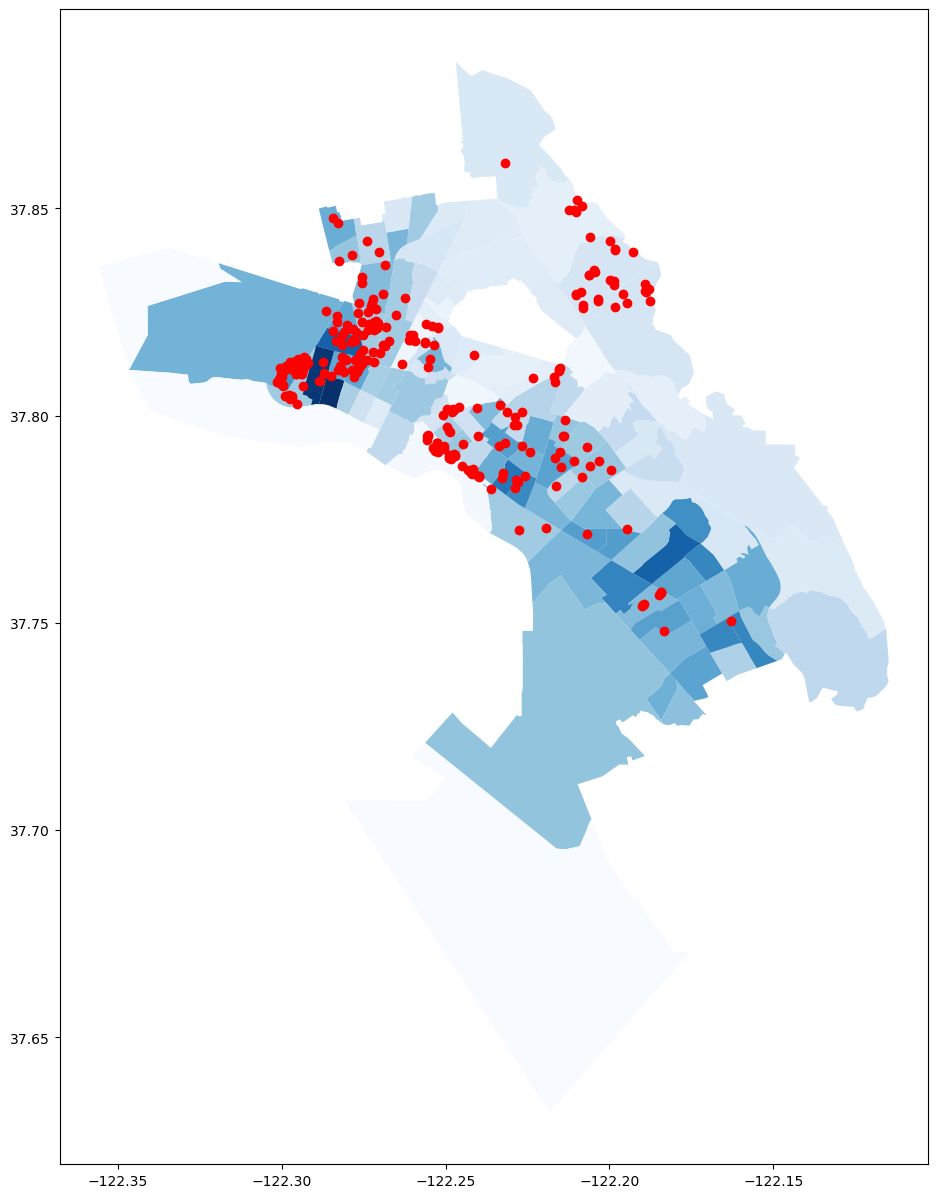

In [71]:
#loading the shapefile and plotting our points
oakland = gpd.read_file('GET_2021.shp')
fig, ax = plt.subplots(figsize=(15,15))
oakland.to_crs(epsg=4326).plot(ax=ax, column='Single_Par', cmap ='Blues')
geo_df.plot(ax=ax,color='red')